In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import zipfile
import tensorflow as tf
from google.colab import drive

#load data

In [ ]:

# Pastikan nama file ZIP benar, sesuai dengan file yang ada di folder Anda
zip_path = '/content/Penyakit_Kulit_Daisy.zip'  # Path ke file ZIP
output_path = '/content/Penyakit_Kulit'  # Path folder tujuan ekstraksi

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_path)

print(f"Ekstraksi selesai ke folder: {output_path}")


Ekstraksi selesai ke folder: /content/Penyakit_Kulit


In [ ]:
# Definisikan path train dan test dataset
train_dir = os.path.join(output_path, 'train')
test_dir = os.path.join(output_path, 'test')

In [ ]:
# Verifikasi isi folder
print("Train classes:", os.listdir(train_dir))
print("Test classes:", os.listdir(test_dir))

Train classes: ['Jerawat', 'Kurap', 'Panu', 'Cacar Air', 'Biduran', 'Bisul']
Test classes: ['Jerawat', 'Kurap', 'Panu', 'Cacar Air', 'Biduran', 'Bisul']


In [ ]:
# Definisikan label kelas
labels = ['Biduran', 'Bisul', 'Cacar Air', 'Jerawat', 'Kurap', 'Panu']


#Augmentasi

In [ ]:
# Data Augmentasi untuk meningkatkan variasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Buat generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 627 images belonging to 6 classes.
Found 161 images belonging to 6 classes.


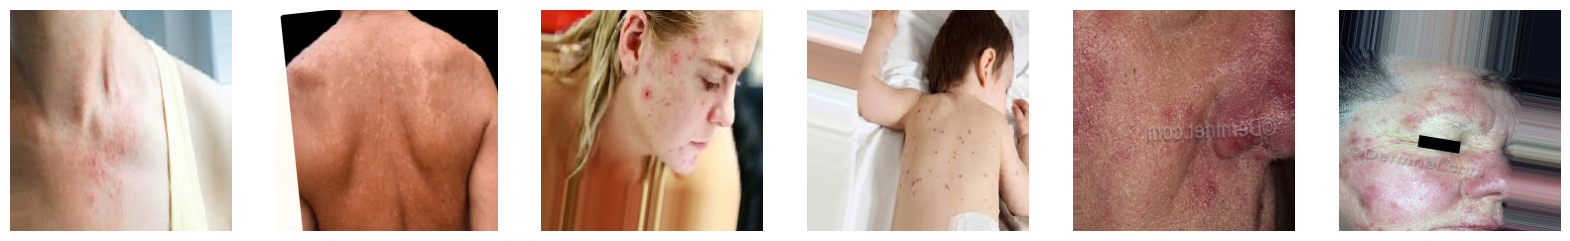

In [ ]:
# Tampilkan beberapa gambar dari dataset
images, labels = next(train_generator)
fig, axes = plt.subplots(1, 6, figsize=(20, 10))
for i, img in enumerate(images[:6]):
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 kelas
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,266,374 (73.50 MB)

 Trainable params: 19,266,374 (73.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks untuk menyimpan model terbaik dan mengatur learning rate
checkpointer = ModelCheckpoint(filepath='best_model.keras', save_best_only=True, verbose=1)
scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
history = model.fit(
    train_generator,
    epochs=40,
    validation_data=validation_generator,
    callbacks=[checkpointer, scheduler, early_stopper]
)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1653 - loss: 2.0793
Epoch 1: val_loss improved from inf to 1.77749, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step - accuracy: 0.1659 - loss: 2.0709 - val_accuracy: 0.1988 - val_loss: 1.7775 - learning_rate: 0.0010
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2014 - loss: 1.7721
Epoch 2: val_loss improved from 1.77749 to 1.66150, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.2031 - loss: 1.7714 - val_accuracy: 0.3106 - val_loss: 1.6615 - learning_rate: 0.0010
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2788 - loss: 1.6705
Epoch 3: val_loss improved from 1.66150 to 1.60893, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 154s 6s/step - accuracy: 0.2787 - loss: 1.6707 - val_accuracy: 0.3230 - val_loss: 1.6089 - learning_rate: 0.0010
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2947 - loss: 1.6421
Epoch 4:

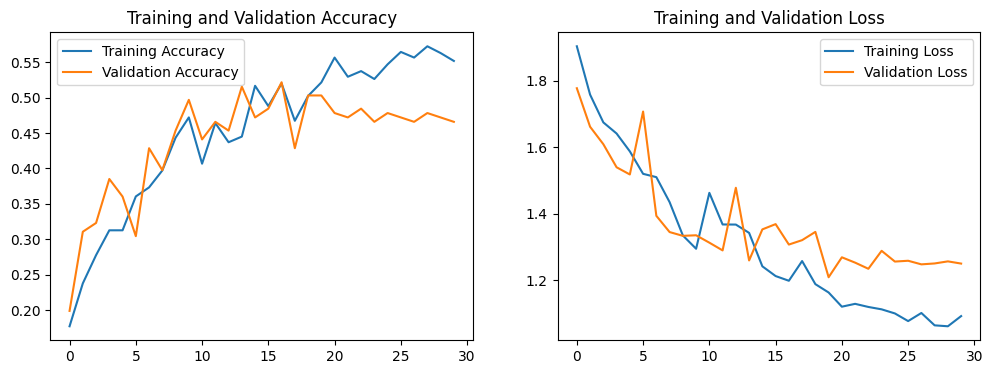

In [ ]:
# Plot Akurasi dan Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.4979 - loss: 1.2234
Test Accuracy: 0.50
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
Classification Report
              precision    recall  f1-score   support

     Biduran       0.22      0.19      0.20        32
       Bisul       0.26      0.22      0.24        23
   Cacar Air       0.22      0.31      0.26        26
     Jerawat       0.18      0.19      0.18        31
       Kurap       0.19      0.19      0.19        26
        Panu       0.22      0.17      0.20        23

    accuracy                           0.21       161
   macro avg       0.22      0.21      0.21       161
weighted avg       0.21      0.21      0.21       161



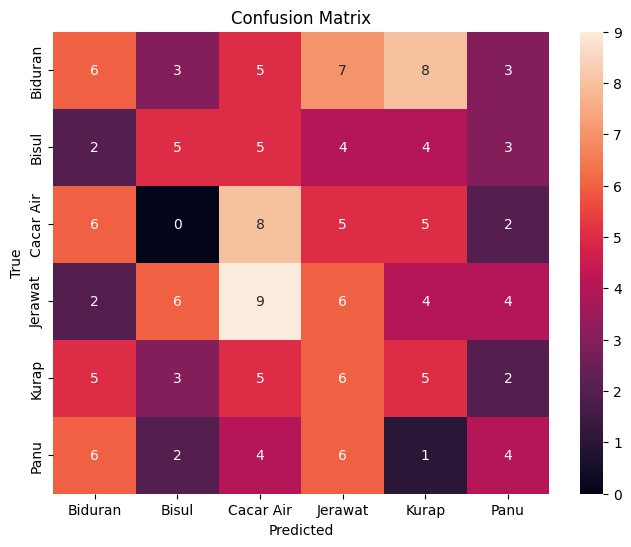

In [ ]:
import seaborn as sns
# Evaluasi model pada test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Confusion Matrix
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=validation_generator.class_indices.keys()))

confusion_mtx = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('daisy50.keras')  # Menyimpan model


In [ ]:
import tensorflow as tf

# Load model dari file .keras
model = tf.keras.models.load_model('daisy50.keras')

# Konversi ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model dalam format .tflite
with open('daisy50.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke format .tflite")


Saved artifact at '/tmp/tmpv6r5cs7g'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  133258526096928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258525659504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526076496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526213392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526224128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526220960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526220608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526330368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526336352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526340928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133258526500016

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

labels = ['Biduran', 'Bisul', 'Cacar Air', 'Jerawat', 'Kurap', 'Panu']

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path='daisy50.tflite')
interpreter.allocate_tensors()

# Ambil detail input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Fungsi untuk memproses gambar
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize gambar ke 224x224
    img_array = img_to_array(img) / 255.0              # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)      # Tambahkan batch dimension
    return img_array

# Fungsi untuk melakukan prediksi
def predict(image_path):
    input_image = preprocess_image(image_path)
    interpreter.set_tensor(input_details[0]['index'], input_image)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_index = np.argmax(output_data)
    predicted_class = labels[predicted_class_index]
    return predicted_class, predicted_class_index

# Unggah file gambar dari laptop
uploaded = files.upload()

# Prediksi setiap file yang diunggah
for filename in uploaded.keys():
    pred_class, pred_index = predict(filename)
    print(f"Gambar: {filename}")
    print(f"Prediksi Kelas (angka): {pred_index}")
    print(f"Prediksi Kelas (label): {pred_class}")

Saving panu 11.jpg to panu 11.jpg
Gambar: panu 11.jpg
Prediksi Kelas (angka): 5
Prediksi Kelas (label): Panu


In [ ]:
from google.colab import files

# Unduh file ke laptop
files.download('daisy50.tflite')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>